# 1 Feature Engineering no dataset da Quantum Finance

Utilizando todos os conhecimentos apresentados no decorrer da disciplina, utilize o dataset Quantum Finance para manipular os dados que futuramente serão utilizados por um modelo de Machine Learning para realizar predições a respeito do Score.

O resultado da entrega deverá ser um arquivo python com toda a manipulação de dados realizada. O arquivo python deverá conter comentários para facilitar o entendimento no código, de preferência, o arquivo poderá ser entregue em formato .ipynb (Jupyter Notebook).

# 2 Importação das Bibliotecas Necessárias

In [1]:
import pandas as pd #Utilizado para importar arquivos, analisar dados, tratar dados, etc.
import numpy as np #Utilizado para trabalharmos com números
import matplotlib.pyplot as plt #Utilizado para exibição de gráficos
import matplotlib.colors as mcolors
import seaborn as sns#Utilizadopara exibição de gráficos mais robustos

#Warnings: Possui detalhes sobre os avisos e alertas que aparecem, porém podemos utiliza-lo também para que os alertas de
#futuras atualizações e metodos depreciados não sejam exibidos
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split # Utilizado para separar dados de treino e teste
from sklearn.preprocessing import StandardScaler # Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import MinMaxScaler # Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import LabelEncoder # Utilizado para fazer o OneHotEncoding
from sklearn.linear_model import LinearRegression # Algoritmo de Regressão Linear
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
from sklearn.metrics import root_mean_squared_error # Utilizado para medir RMSE
from scipy.stats import chi2_contingency # Utilizado para realizar teste chi-quadrado


# 3 Carregamento e Exploração do Dataset

## 3.1 Descrição do Dataset

Vamos usar o dataset da Quantum Finance:

| Variáveis               | Descrição                        | Categorias                               |
| ----------------------- | -------------------------------- | ---------------------------------------- |
| id                      | ID                               |                                          |
| idade                   | Idade em anos                    |                                          |
| sexo                    | Sexo                             | F = Feminino                             |
| M=Masculino             |
| estado_civil            | Estado civil                     | Solteiro                                 |
| Casado                  |
| Divorciado              |
| escola                  | Grau de Instrução                | ensino fundam = até o ensino fundamental |
| ensino médio            |
| Graduação               |
| Doutorado               |
| Qte_dependentes         | Quantidade de dependentes        |                                          |
| tempo_ultimoservico     | Tempo de trabalho (meses)        |                                          |
| trabalha                | Trabalha                         | 0=Não                                    |
| 1=Sim                   |
| vl_salario_mil          | Sálario                          |                                          |
| reg_moradia             | Região da moradia                | 1=Segmento geográfico A                  |
| 2=Segmento geográfico B |
| 3=Segmento geográfico C |
| 4=Segmento geográfico D |
| 5=Segmento geográfico E |
| 6=Segmento geográfico F |
| casa_propria            | Casa própria                     | 0=Não                                    |
| 1=Sim                   |
| vl_imovel_em_mil        | Valor do imóvel (R$)             |                                          |
| Qte_cartoes             | Quantidade de cartões de crédito |                                          |
| Qte_carros              | Quantidade de carros             |                                          |
| SCORE_CREDITO           | Credit Scorging                  |                                          |


## 3.2 Carregamento do Dataset

In [2]:
df = pd.read_csv("datasets/Base_ScoreCredito_QuantumFinance.csv", delimiter=';')

# Mostrando as primeiras linhas do dataset
df.head()

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,"40,089665024322",3,0,0,1,1,778
1,708083283,58,M,solteiro,ensino fundam,0,44,1,"66,557645274838",3,0,0,1,0,"276,3"
2,708084558,46,M,divorciado,doutorado,3,35,1,"123,68182089138",6,0,0,1,1,401
3,708085458,34,F,solteiro,mestrado,0,22,1,"19,7159343168329",6,0,0,1,0,"347,4"
4,708086958,49,F,casado,mestrado,2,36,0,0,3,1,437,1,2,476


## 3.3 Análise Exploratória

In [3]:
#Verificar as últimas linhas do DataFrame
#Podemos verificar que na variavél estado_civil, possui registro invalido
#como 'na'
df.tail()

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
10122,828288333,50,M,casado,mestrado,0,45,1,"100,128970755",4,0,0,1,0,470
10123,828291858,38,M,solteiro,ensino fundam,0,31,1,"89,80599574656",6,0,0,1,1,432
10124,828294933,49,F,casado,graduacao,3,43,1,"19,7993057098452",3,1,252,1,1,406
10125,828298908,54,M,casado,ensino medio,4,48,1,"194,78317642784",4,0,0,1,1,387
10126,828343083,43,F,na,graduacao,4,36,1,"20,9257930255374",3,1,365,1,1,513


In [5]:
#Verificar informações básicas sobre nossos dados
#Como por exemplo, Variáveis, Tipo, Quantidade de Registro, dentre outros
#Com base nas infromações exibidas temos as seguinte notas:
#A Variável ID pode ser removida, pois não irá agregar para o modelo
#As variável estado_civil, sexo e escola deve ser realizado OneHotEncoding
#As variáveis vl_salario_mil e SCORE_CREDITO estão como string e precisa ser númerica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10127 non-null  int64 
 1   idade                10127 non-null  int64 
 2   sexo                 10127 non-null  object
 3   estado_civil         10127 non-null  object
 4   escola               10127 non-null  object
 5   Qte_dependentes      10127 non-null  int64 
 6   tempo_ultimoservico  10127 non-null  int64 
 7   trabalha             10127 non-null  int64 
 8   vl_salario_mil       10127 non-null  object
 9   reg_moradia          10127 non-null  int64 
 10  casa_propria         10127 non-null  int64 
 11  vl_imovel_em_mil     10127 non-null  int64 
 12  Qte_cartoes          10127 non-null  int64 
 13  Qte_carros           10127 non-null  int64 
 14  SCORE_CREDITO        10127 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.2+ MB


In [1214]:
#Vamos excluir a variável ID
df_score.drop('id',axis = 1, inplace = True)

In [1215]:
# Transformando na em estado_civil em não informado, para ajudar em análises futuras
#df_score['estado_civil'] = df_score['estado_civil'].apply(lambda x: 'Não informado' if x == 'na' else x)

#df_score.head(5)

In [1216]:
#Agora estamos excluindo todas os registros da variável estado civil que está
#como 'na' para não interfirir no modelo
df_score.drop(df_score[df_score['estado_civil'] == 'na'].index, inplace=True)

#!!!!!!!!!!!!!! COMENTAR PARA CONVERTER OS NA's DE ACORDO COM A MODA DA IDADE

In [1217]:
# Analisando o estado civil
print(df_score['estado_civil'].value_counts())

estado_civil
casado        4687
solteiro      3943
divorciado     748
Name: count, dtype: int64


In [1218]:
#Vamos transformar as variáveis vl_salario_mil e SCORE_CREDITO em númericas
#float64

df_score['vl_salario_mil'] = df_score['vl_salario_mil'].str.replace(',','.').astype(float)
df_score['SCORE_CREDITO'] = df_score['SCORE_CREDITO'].str.replace(',','.').astype(float)

In [1219]:
#Vamos verificar se a alteração do tipo foi feita com sucesso
#E notamos com o resultado que foi feito com sucesso
df_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9378 entries, 0 to 10125
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idade                9378 non-null   int64  
 1   sexo                 9378 non-null   object 
 2   estado_civil         9378 non-null   object 
 3   escola               9378 non-null   object 
 4   Qte_dependentes      9378 non-null   int64  
 5   tempo_ultimoservico  9378 non-null   int64  
 6   trabalha             9378 non-null   int64  
 7   vl_salario_mil       9378 non-null   float64
 8   reg_moradia          9378 non-null   int64  
 9   casa_propria         9378 non-null   int64  
 10  vl_imovel_em_mil     9378 non-null   int64  
 11  Qte_cartoes          9378 non-null   int64  
 12  Qte_carros           9378 non-null   int64  
 13  SCORE_CREDITO        9378 non-null   float64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [1220]:
#Verificando se foi excluido com sucesso
df_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9378 entries, 0 to 10125
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idade                9378 non-null   int64  
 1   sexo                 9378 non-null   object 
 2   estado_civil         9378 non-null   object 
 3   escola               9378 non-null   object 
 4   Qte_dependentes      9378 non-null   int64  
 5   tempo_ultimoservico  9378 non-null   int64  
 6   trabalha             9378 non-null   int64  
 7   vl_salario_mil       9378 non-null   float64
 8   reg_moradia          9378 non-null   int64  
 9   casa_propria         9378 non-null   int64  
 10  vl_imovel_em_mil     9378 non-null   int64  
 11  Qte_cartoes          9378 non-null   int64  
 12  Qte_carros           9378 non-null   int64  
 13  SCORE_CREDITO        9378 non-null   float64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [1221]:
# Determinando associação entre escola e estado_civil	

# Criando tabela de contingencia
contingency_table = pd.crosstab(df_score['sexo'], df_score['estado_civil'])

# Mostrando a tabela de contingencia
print(contingency_table)

# Realizando teste chi-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Mostrando resultados
print("Chi-Quadrado: ", chi2)
print("p-value: ", p)
print("Graus de liberdade: ", dof)

# Interpretando resultando
if p < 0.05:
    print("Rejeitada a hipotese nula: as variávels não são independentes")
else:
    print("Hipotese nula não rejeitada: as variáveis são independentes")


estado_civil  casado  divorciado  solteiro
sexo                                      
F               2451         402      2125
M               2236         346      1818
Chi-Quadrado:  2.3424358297860524
p-value:  0.3099891708382256
Graus de liberdade:  2
Hipotese nula não rejeitada: as variáveis são independentes


In [1222]:
# Determinando associação entre escola e estado_civil

# Criando tabela de contiengencia
contingency_table = pd.crosstab(df_score['escola'], df_score['estado_civil'])

# Mostrando a tabela de contingencia
print(contingency_table)

# Realizando teste chi-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Mostrando resultados
print("Chi-Quadrado: ", chi2)
print("p-value: ", p)
print("Graus de liberdade: ", dof)

# Interpretando resultando
if p < 0.05:
    print("Rejeitada a hipotese nula: as variávels não são independentes")
else:
    print("Hipotese nula não rejeitada: as variáveis são independentes")

estado_civil   casado  divorciado  solteiro
escola                                     
doutorado         350          58       289
ensino fundam    1027         173       927
ensino medio     1587         234      1283
graduacao         991         134       808
mestrado          732         149       636
Chi-Quadrado:  15.290555586541013
p-value:  0.05373600251198284
Graus de liberdade:  8
Hipotese nula não rejeitada: as variáveis são independentes


In [1223]:
# Determinando associação entre sexo e escola

# Criando tabela de contiengencia
contingency_table = pd.crosstab(df_score['sexo'], df_score['escola'])

# Mostrando a tabela de contingencia
print(contingency_table)

# Realizando teste chi-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Mostrando resultados
print("Chi-Quadrado: ", chi2)
print("p-value: ", p)
print("Graus de liberdade: ", dof)

# Interpretando resultando
# !!!!!!!!!!!!!!!!!!! VALIDAR RESULTADO !!!!
if p < 0.05:
    print("Rejeitada a hipotese nula: as variávels não são independentes")
else:
    print("Hipotese nula não rejeitada: as variáveis são independentes")

escola  doutorado  ensino fundam  ensino medio  graduacao  mestrado
sexo                                                               
F             199           1333          1705        955       786
M             498            794          1399        978       731
Chi-Quadrado:  262.66014820722467
p-value:  1.2182377823471706e-55
Graus de liberdade:  4
Rejeitada a hipotese nula: as variávels não são independentes


In [1224]:
# Usando Moda

# Agrupando idade para obter a moda de estado_civil
#mode_estado_civil = df_score.groupby('idade')['estado_civil'].apply(lambda x: x.mode().iloc[0])

# Inputando dados não informados de estado_civil com base na moda da idade
#df_score['estado_civil'] = df_score.apply(lambda row: mode_estado_civil[row['idade']] if row['estado_civil'] == 'na' else row['estado_civil'], axis=1)

# Analisando como ficou o estado civil
#print(df_score['estado_civil'].value_counts())

In [1225]:
#Agora vamos verificar se as variáveis númericas possuem outliers
#para isso iremos utilizar um gráfico boxplot

#Primeiro vamos carregar em uma lista as variáveis quantitativas
var_num = []
# Iterando sobre os nomes das colunas
for i in df_score.columns[:48]:
    # Verificando se o tipo da coluna é int64 ou float64
    if df_score[i].dtype == 'int64' or df_score[i].dtype == 'float64':
        var_num.append(i)

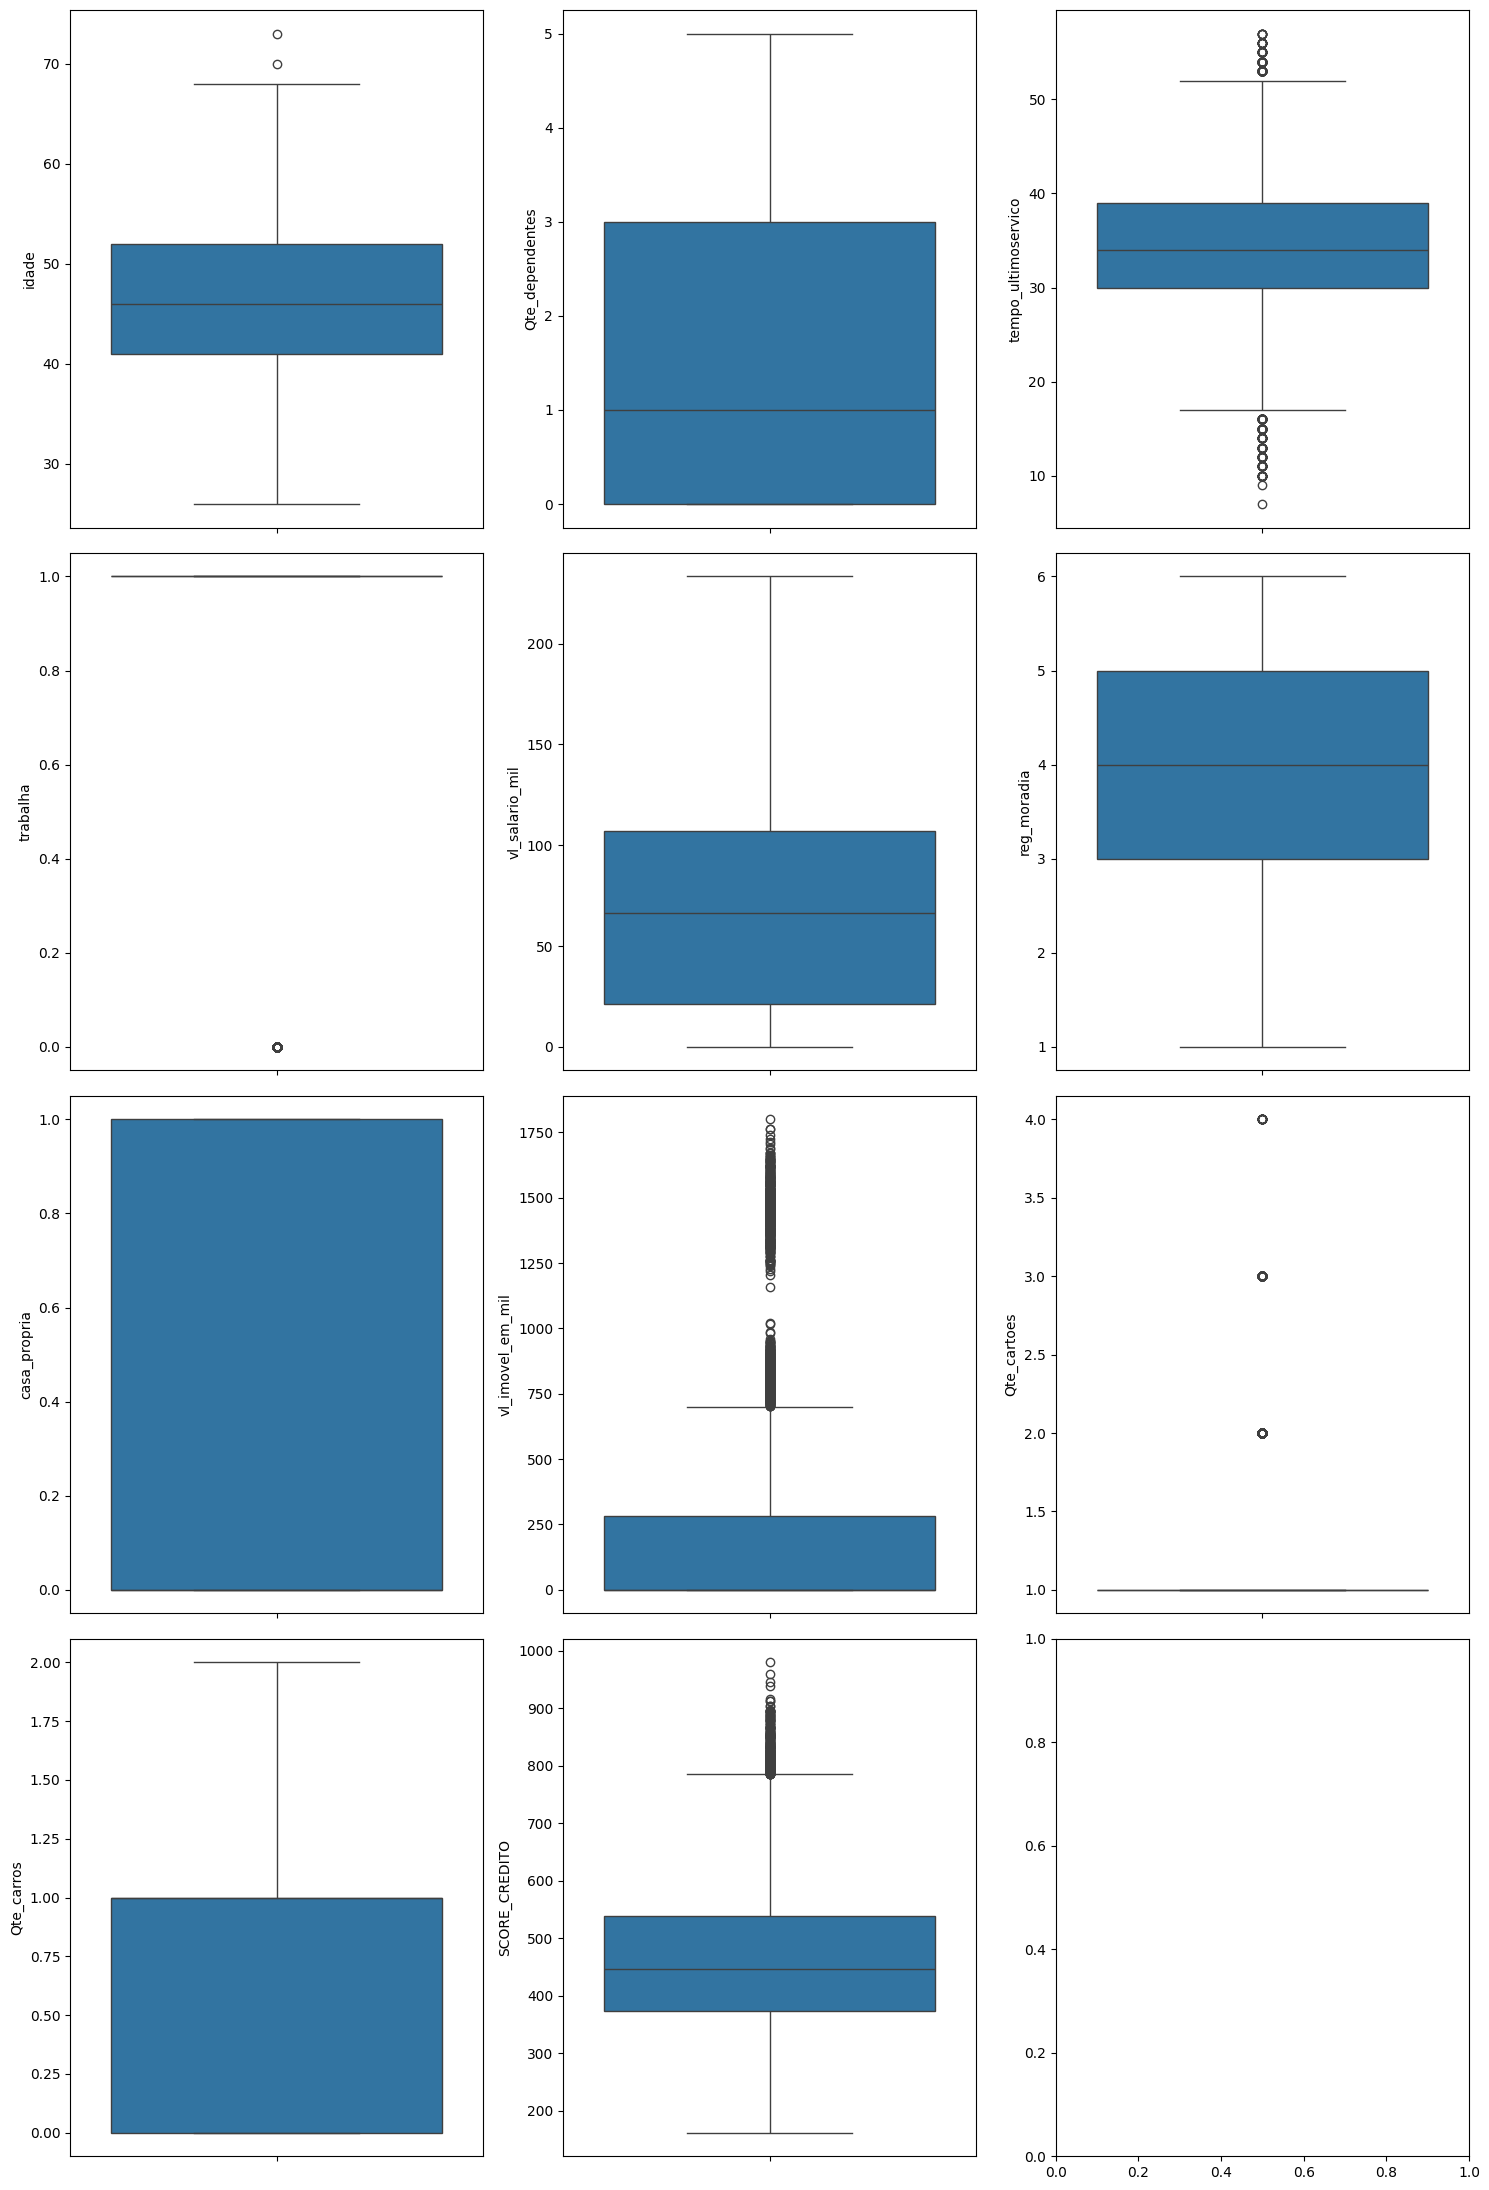

In [1226]:
#Agora iremos gerar os gráficos de uma única vez

plt.rcParams['figure.figsize'] = [15,22]
plt.rcParams['figure.autolayout']=True

f, axes = plt.subplots(4,3)

row = 0
column = 0

for i in var_num:
  sns.boxplot(data = df_score, y = i, ax = axes[row][column])
  column += 1
  if column == 3:
   row +=1
   column =0

plt.show()

In [1227]:
#Apesar do boxplot está apondando que as vaariáveis:
#tempo_ultimoservico,vl_imovel_em_mil, e SCORE_CREDITO, possuem possiveis
#outliers. Contudo pode ser considerado um dado normal.

#Porém iremos verificar estas variáveis na distribuição através do groupby
df_score.groupby(['tempo_ultimoservico']).size()

tempo_ultimoservico
7       1
9       1
10     19
11     28
12     31
13     28
14     23
15     48
16     44
17     60
18     72
19     81
20     97
21    125
22    122
23    167
24    177
25    203
26    225
27    254
28    257
29    265
30    297
31    301
32    356
33    936
34    846
35    771
36    437
37    324
38    289
39    263
40    299
41    241
42    246
43    216
44    191
45    177
46    145
47    124
48    121
49     83
50     86
51     61
52     61
53     72
54     61
55     27
56     13
57      6
dtype: int64

In [1228]:
df_score.groupby(['vl_imovel_em_mil']).size()

vl_imovel_em_mil
0       6139
150        2
151        5
152        6
153        4
        ... 
1712       1
1726       1
1739       1
1763       2
1800       1
Length: 881, dtype: int64

In [1229]:
df_score.groupby(['SCORE_CREDITO']).size()

SCORE_CREDITO
162.00    1
171.90    1
172.80    1
175.50    1
177.00    1
         ..
915.00    1
938.00    1
945.00    1
958.65    1
979.65    1
Length: 1827, dtype: int64

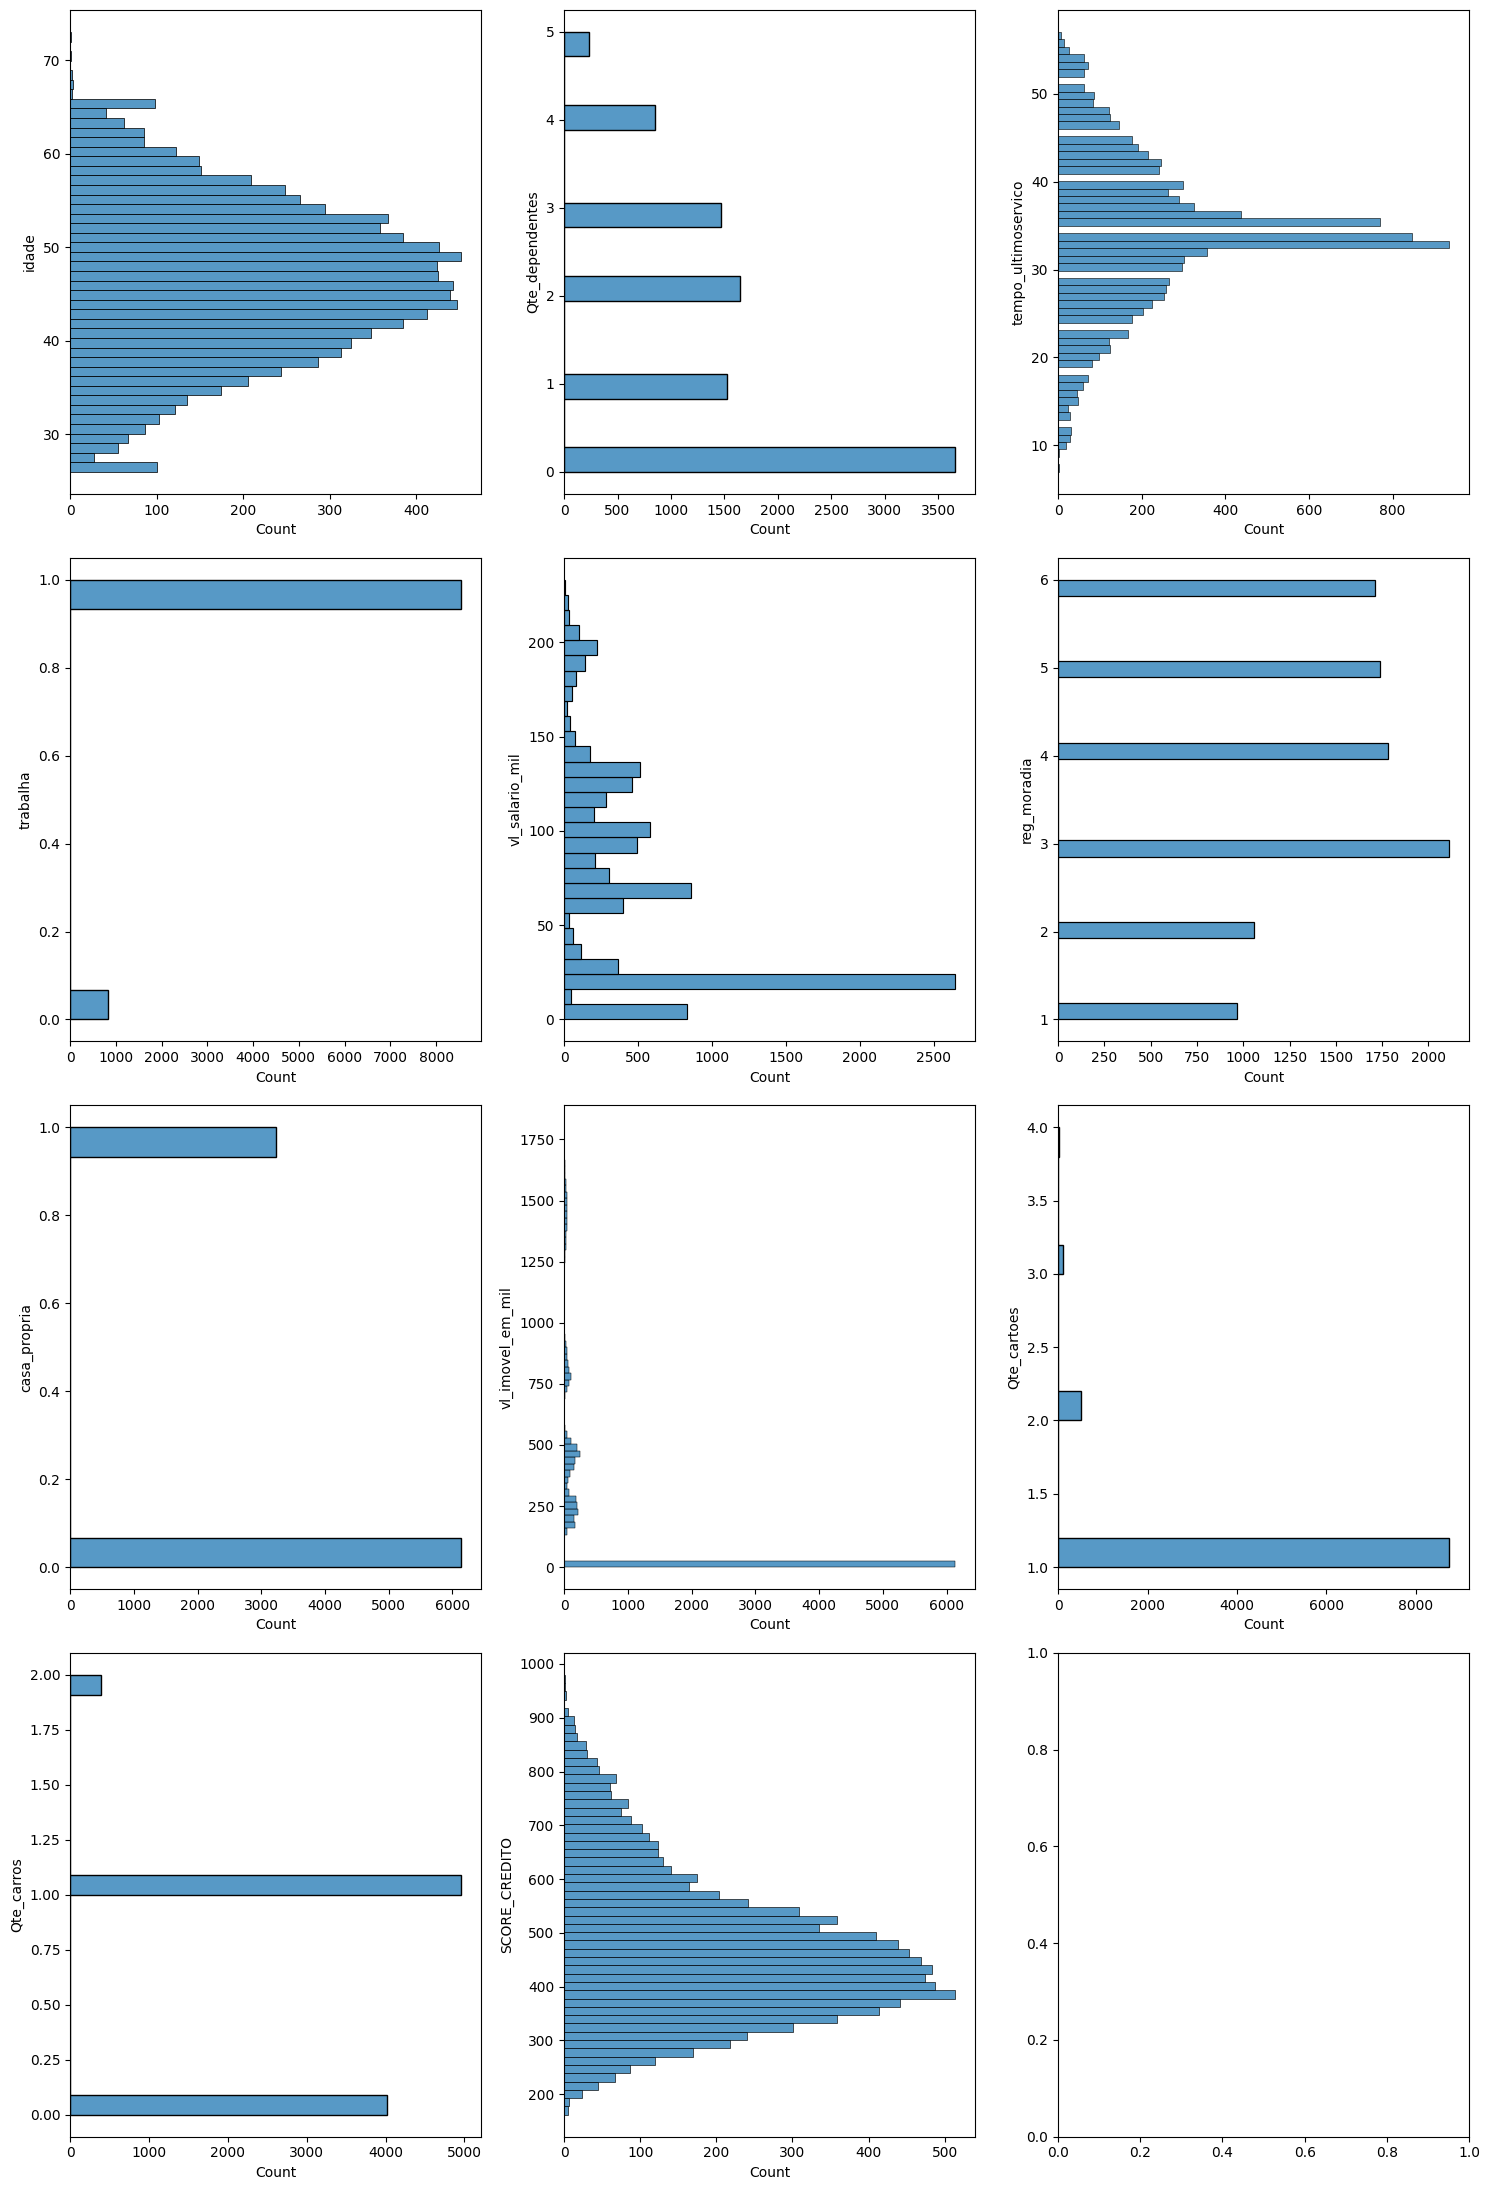

In [1230]:
#Para poder visualizar a distribuição iremos gerar um gráfico do tipo histograma
plt.rcParams['figure.figsize'] = [15,22]
plt.rcParams['figure.autolayout']=True

f, axes = plt.subplots(4,3)

row = 0
column = 0

for i in var_num:
  sns.histplot(data = df_score, y = i, ax = axes[row][column])
  column += 1
  if column == 3:
   row +=1
   column =0

plt.show()

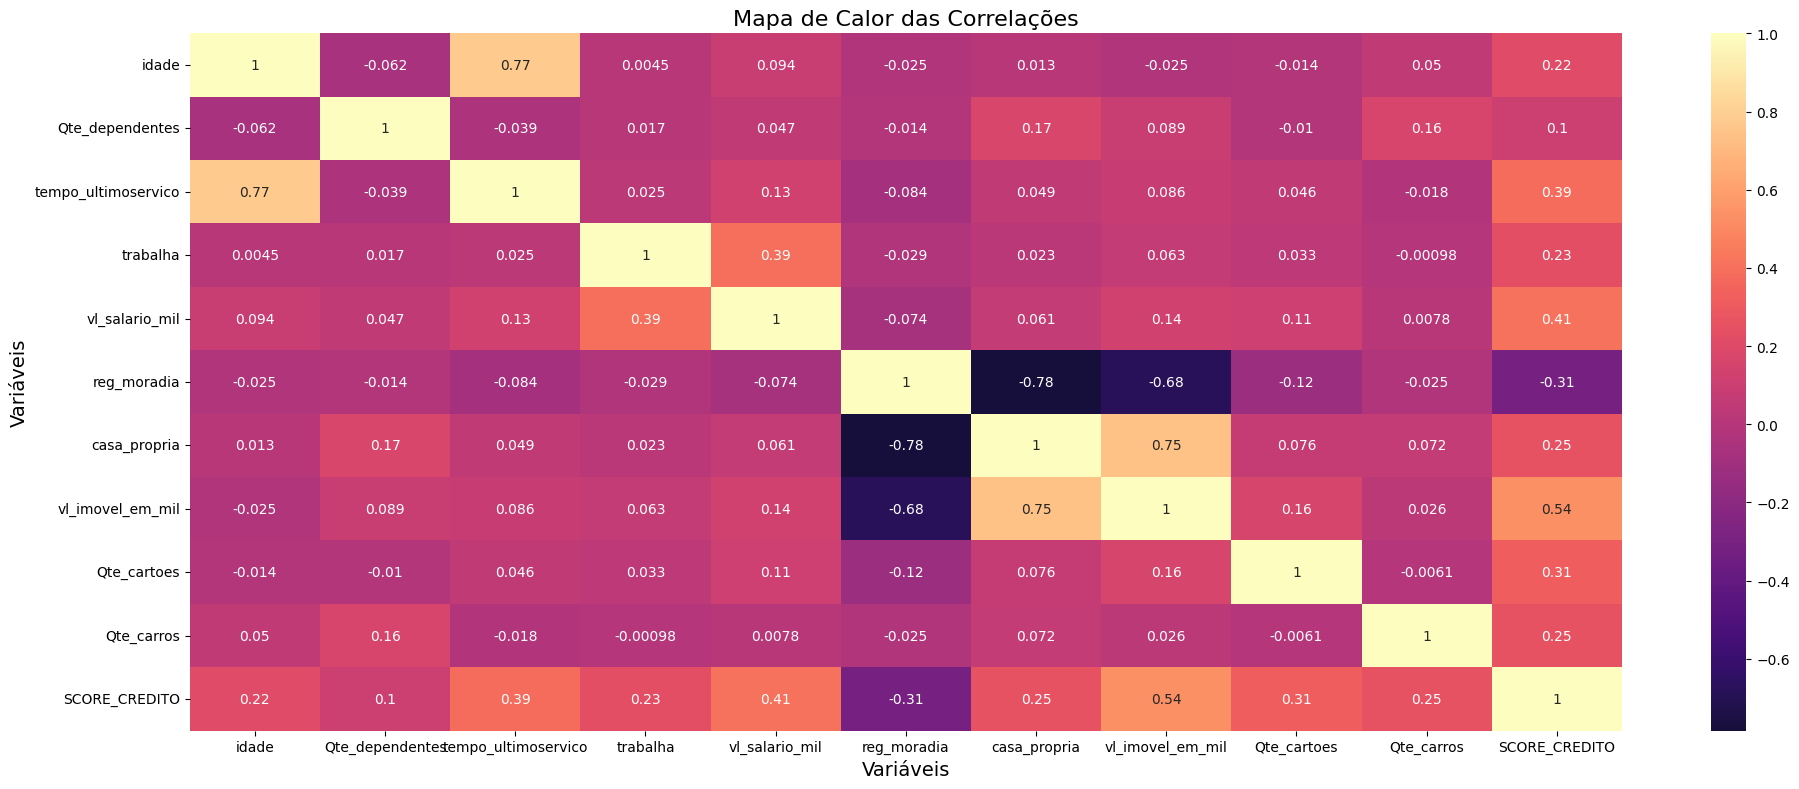

In [1231]:
#Iremos utilizar agora um hitmap para visualizar a correlação entre as variáveis
# Selecionar apenas colunas numéricas
df_numeric = df_score.select_dtypes(include=['int64', 'float64'])

# Configurar o tamanho da figura
plt.rcParams['figure.figsize'] = [20, 8]

# Criar o heatmap com anotações e colormap personalizado
ax = sns.heatmap(df_numeric.corr(), annot=True, cmap='magma',center=0)

# Configurar o título e os rótulos dos eixos
ax.set_title('Mapa de Calor das Correlações', fontsize=16)
ax.set_xlabel('Variáveis', fontsize=14)
ax.set_ylabel('Variáveis', fontsize=14)

# Exibir o gráfico
plt.show()

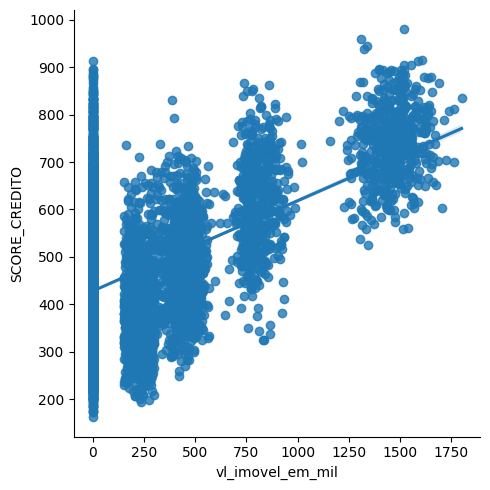

In [1232]:
#Com base no heatmap, agora vamos gerar um gráfico de disperção para poder
#avaliar a correlação de algumas variáveis em relação ao nosso target(score)

#A variávei que possui uma correlação Forte é a  vl_imovel_em_mil (0.54)
sns.lmplot(x='vl_imovel_em_mil',y='SCORE_CREDITO',data = df_score)

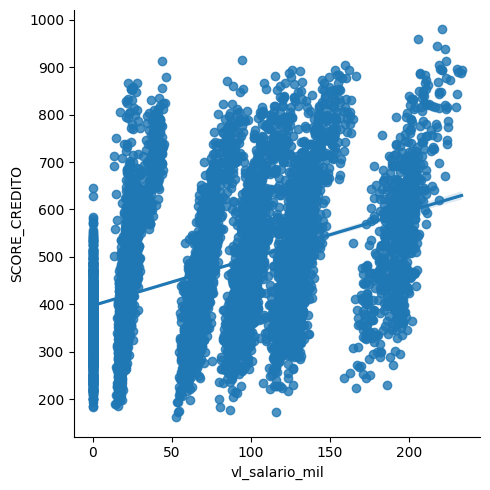

In [1233]:
#As variáveis que possuem correlação moderada são:
#vl_salario_mil,tempo_ultimoservico
# Definindo os gráficos utilizando FacetGrid
sns.lmplot(x='vl_salario_mil',y='SCORE_CREDITO',data = df_score)

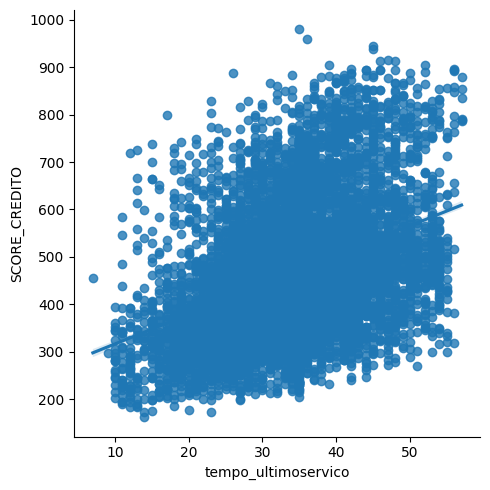

In [1234]:
sns.lmplot(x='tempo_ultimoservico',y='SCORE_CREDITO',data = df_score)

In [1235]:
#Vamos utilizar a variável idade para criar uma Faixa Etária e para isso iremos
#fazer uma engenharia de atributo
print('Menor Idade: ',df_score['idade'].min())
print('Maior Idade: ',df_score['idade'].max())

Menor Idade:  26
Maior Idade:  73


In [1236]:
age_bins = [0,30,40,50,60]
age_category =['Até 30','31 a 40','41 a 50',"Maior que 50"]

df_score['Faixa_Etaria'] = pd.cut(df_score['idade'],age_bins,labels=age_category)
df_score['Faixa_Etaria'].value_counts()

Faixa_Etaria
41 a 50         4200
Maior que 50    2549
31 a 40         1994
Até 30           251
Name: count, dtype: int64

In [1237]:
#Vamor visualizar a média do SCORE_CREDITO por Faixa_Etaria
df_score.groupby('Faixa_Etaria')['SCORE_CREDITO'].median()

Faixa_Etaria
Até 30          335.0
31 a 40         389.0
41 a 50         459.0
Maior que 50    475.2
Name: SCORE_CREDITO, dtype: float64

In [1238]:
#Agora vamos começar a analisar nossas variáveis categoricas para isso vamos
#utilizar gráficos
#Primeiro vamos carregar em uma lista as variáveis categoricos
var_cat = []
# Iterando sobre os nomes das colunas
for i in df_score.columns[:48]:
    # Verificando se o tipo da coluna é int64 ou float64
    if df_score[i].dtype == 'object' or df_score[i].dtype == 'category':
      var_cat.append(i)

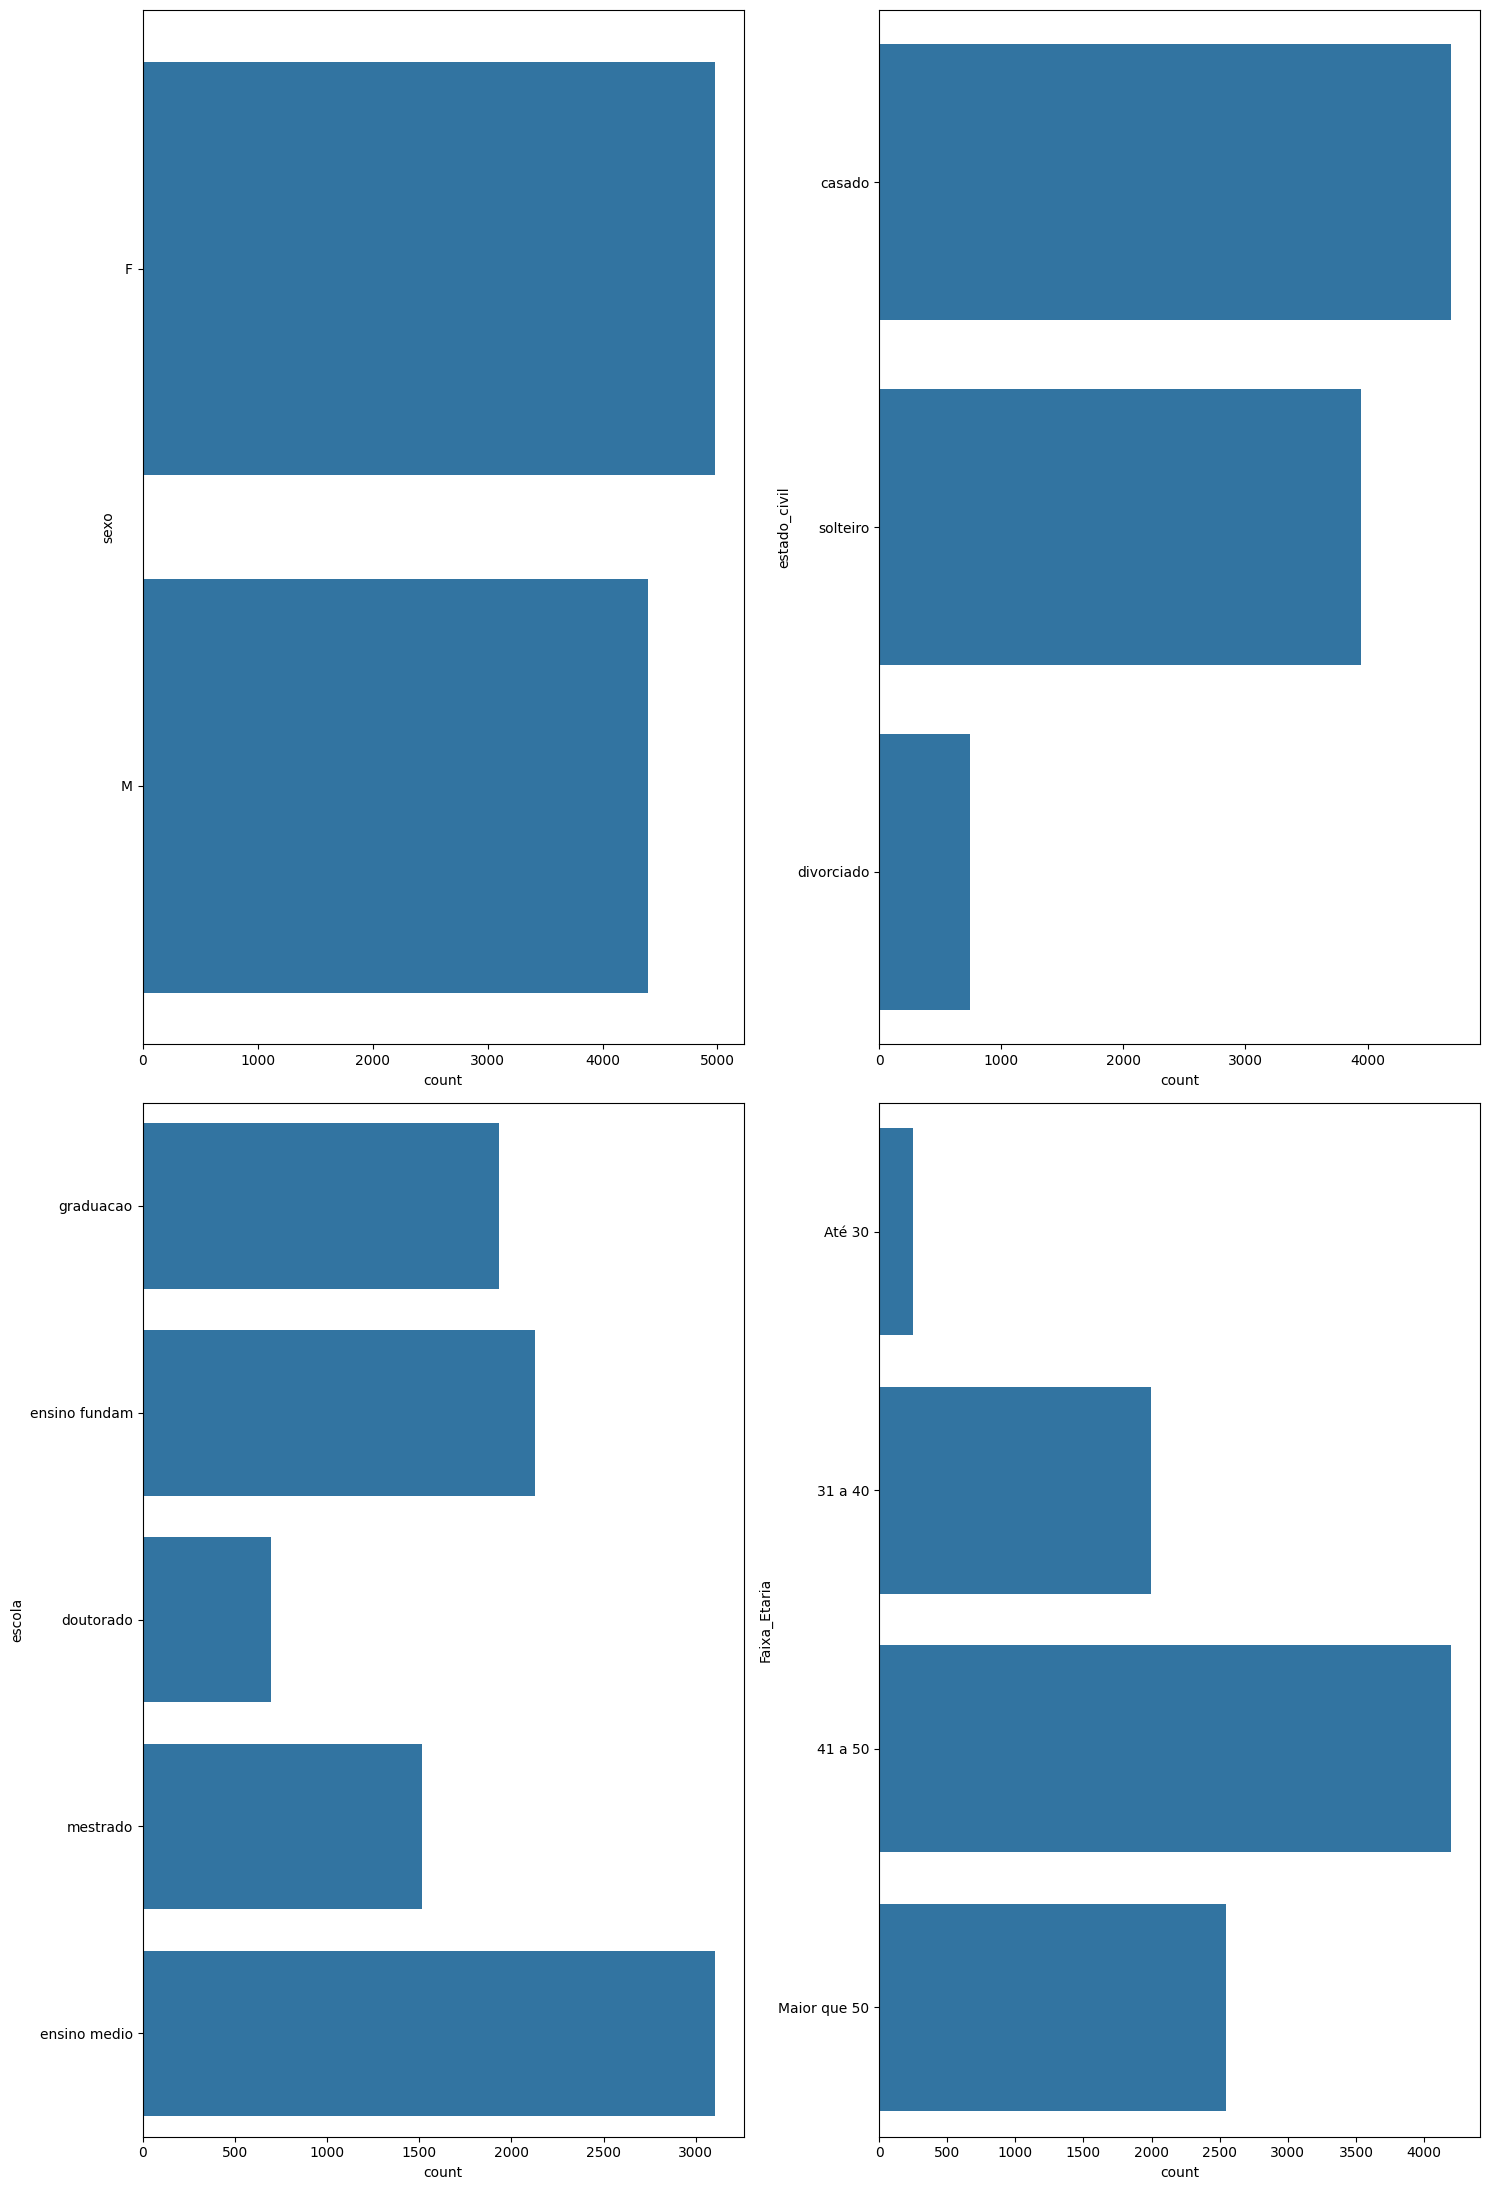

In [1239]:
#Agora iremos gerar os gráficos de uma única vez

plt.rcParams['figure.figsize'] = [15,22]
plt.rcParams['figure.autolayout']=True

f, axes = plt.subplots(2,2)

row = 0
column = 0

for i in var_cat:
  sns.countplot(data = df_score, y = i, ax = axes[row][column])
  column += 1
  if column == 2:
   row +=1
   column =0

plt.show()

In [1240]:
#Tranformando as variáveis categoricas em númericas atraves do OneHotEnconder
#1°-Cria o enconder
lb= LabelEncoder()

#2°-Aplicando o encoder nas variáveis categoricas
df_score['estado_civil'] = lb.fit_transform(df_score['estado_civil'])
df_score['sexo'] = lb.fit_transform(df_score['sexo'])
df_score['escola'] = lb.fit_transform(df_score['escola'])
df_score['Faixa_Etaria'] = lb.fit_transform(df_score['Faixa_Etaria'])

#3°-Remover todos os valores missing gereados
df_score.dropna(inplace=True)

In [1241]:
#Vamos utilizar o comando .head(100) para visualizar as 100 primeiras linhas
df_score.head(100)

,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,Faixa_Etaria
0,45,0,0,3,3,40,1,40.089665,3,0,0,1,1,778.0,1
1,58,1,2,1,0,44,1,66.557645,3,0,0,1,0,276.3,3
2,46,1,1,0,3,35,1,123.681821,6,0,0,1,1,401.0,1
3,34,0,2,4,0,22,1,19.715934,6,0,0,1,0,347.4,0
4,49,0,0,4,2,36,0,0.000000,3,1,437,1,2,476.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,53,0,0,1,2,40,0,0.000000,5,0,0,1,0,279.2,3
105,59,0,2,2,0,34,0,0.000000,3,0,0,1,0,270.0,3
106,37,1,2,2,0,16,1,125.584491,1,1,867,1,0,338.4,0
107,49,0,0,4,3,34,1,19.275503,4,0,0,1,0,361.0,1


In [1242]:
#Podemos observar que agora possuimos todas as variáveis númericas
df_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9378 entries, 0 to 10125
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idade                9378 non-null   int64  
 1   sexo                 9378 non-null   int32  
 2   estado_civil         9378 non-null   int32  
 3   escola               9378 non-null   int32  
 4   Qte_dependentes      9378 non-null   int64  
 5   tempo_ultimoservico  9378 non-null   int64  
 6   trabalha             9378 non-null   int64  
 7   vl_salario_mil       9378 non-null   float64
 8   reg_moradia          9378 non-null   int64  
 9   casa_propria         9378 non-null   int64  
 10  vl_imovel_em_mil     9378 non-null   int64  
 11  Qte_cartoes          9378 non-null   int64  
 12  Qte_carros           9378 non-null   int64  
 13  SCORE_CREDITO        9378 non-null   float64
 14  Faixa_Etaria         9378 non-null   int32  
dtypes: float64(2), int32(4), int64(9)
memory u

In [1243]:
# Como a variável reg_moradia não é realmente uma variável numérica,
# Vamos trata-la com a tecnica de dummy, de modo que seja melhor representada no modelo,
# Separando cada região em uma coluna diferente.

# usand pd.get_dummies para criar as variáveis dummy
reg_moradia_dummy = pd.get_dummies(df_score['reg_moradia'], prefix='reg_moradia')

# convertendo de booleano para inteiro
reg_moradia_dummy = reg_moradia_dummy.astype(int)

reg_moradia_dummy.head(5)


,reg_moradia_1,reg_moradia_2,reg_moradia_3,reg_moradia_4,reg_moradia_5,reg_moradia_6
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,1,0,0,0


In [1244]:
# Concatenando as variáveis dummy de reg_moradia com o dataframe original
df_score = pd.concat([df_score, reg_moradia_dummy], axis=1)

df_score.head(5)

,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,...,Qte_cartoes,Qte_carros,SCORE_CREDITO,Faixa_Etaria,reg_moradia_1,reg_moradia_2,reg_moradia_3,reg_moradia_4,reg_moradia_5,reg_moradia_6
0,45,0,0,3,3,40,1,40.089665,3,0,...,1,1,778.0,1,0,0,1,0,0,0
1,58,1,2,1,0,44,1,66.557645,3,0,...,1,0,276.3,3,0,0,1,0,0,0
2,46,1,1,0,3,35,1,123.681821,6,0,...,1,1,401.0,1,0,0,0,0,0,1
3,34,0,2,4,0,22,1,19.715934,6,0,...,1,0,347.4,0,0,0,0,0,0,1
4,49,0,0,4,2,36,0,0.000000,3,1,...,1,2,476.0,1,0,0,1,0,0,0


# Regressao Linear

In [1245]:
# Instanciar o modelo de Regressão Linear
model1 = LinearRegression()

In [1246]:
df_score.columns

Index(['idade', 'sexo', 'estado_civil', 'escola', 'Qte_dependentes',
       'tempo_ultimoservico', 'trabalha', 'vl_salario_mil', 'reg_moradia',
       'casa_propria', 'vl_imovel_em_mil', 'Qte_cartoes', 'Qte_carros',
       'SCORE_CREDITO', 'Faixa_Etaria', 'reg_moradia_1', 'reg_moradia_2',
       'reg_moradia_3', 'reg_moradia_4', 'reg_moradia_5', 'reg_moradia_6'],
      dtype='object')

In [1247]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9378 entries, 0 to 10125
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idade                9378 non-null   int64  
 1   sexo                 9378 non-null   int32  
 2   estado_civil         9378 non-null   int32  
 3   escola               9378 non-null   int32  
 4   Qte_dependentes      9378 non-null   int64  
 5   tempo_ultimoservico  9378 non-null   int64  
 6   trabalha             9378 non-null   int64  
 7   vl_salario_mil       9378 non-null   float64
 8   reg_moradia          9378 non-null   int64  
 9   casa_propria         9378 non-null   int64  
 10  vl_imovel_em_mil     9378 non-null   int64  
 11  Qte_cartoes          9378 non-null   int64  
 12  Qte_carros           9378 non-null   int64  
 13  SCORE_CREDITO        9378 non-null   float64
 14  Faixa_Etaria         9378 non-null   int32  
 15  reg_moradia_1        9378 non-null   int32

In [1256]:
# Separar variáveis independentes (X) e dependente (y)
y = df_score['SCORE_CREDITO']

X = df_score.drop(['SCORE_CREDITO','reg_moradia'],axis=1)
X.head(1)

,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,Faixa_Etaria,reg_moradia_1,reg_moradia_2,reg_moradia_3,reg_moradia_4,reg_moradia_5,reg_moradia_6
0,45,0,0,3,3,40,1,40.089665,0,0,1,1,1,0,0,1,0,0,0


In [1249]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2,random_state =42)

print(f"Tamanho do conjunto de treinamento: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treinamento: (7502, 19)
Tamanho do conjunto de teste: (1876, 19)


In [1250]:
# Treinar o modelo
model1.fit(X_train,y_train)


LinearRegression()

In [1251]:
model1.score(X_test,y_test)

0.6752962358677203

In [1252]:
# Fazendo previsão da base de testes
y_pred = model1.predict(X_test)

In [1253]:
# print the coefficients of the model
print("Coeficientes: ", model1.coef_)
print("Intercept: ", model1.intercept_)

# print the R-squared value of the model
print("R-squared: ", model1.score(X_test, y_test))

# Calcular o RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")

Coeficientes:  [  -0.55045499  -21.85370249   -0.9786867     4.17751       5.75299556
    5.72926064   40.89147033    0.73504097 -120.66957615    0.23248191
   72.57684411   60.02097031   -5.37736654   17.39240421   17.94987287
   16.80685489  -15.12628285  -17.28828061  -19.73456851]
Intercept:  91.26534078633688
R-squared:  0.6752962358677203
RMSE: 75.71105825593165


Média dos resíduos:  -3.8815218614592184
Desvio padrão dos resíduos:  75.61149469671983


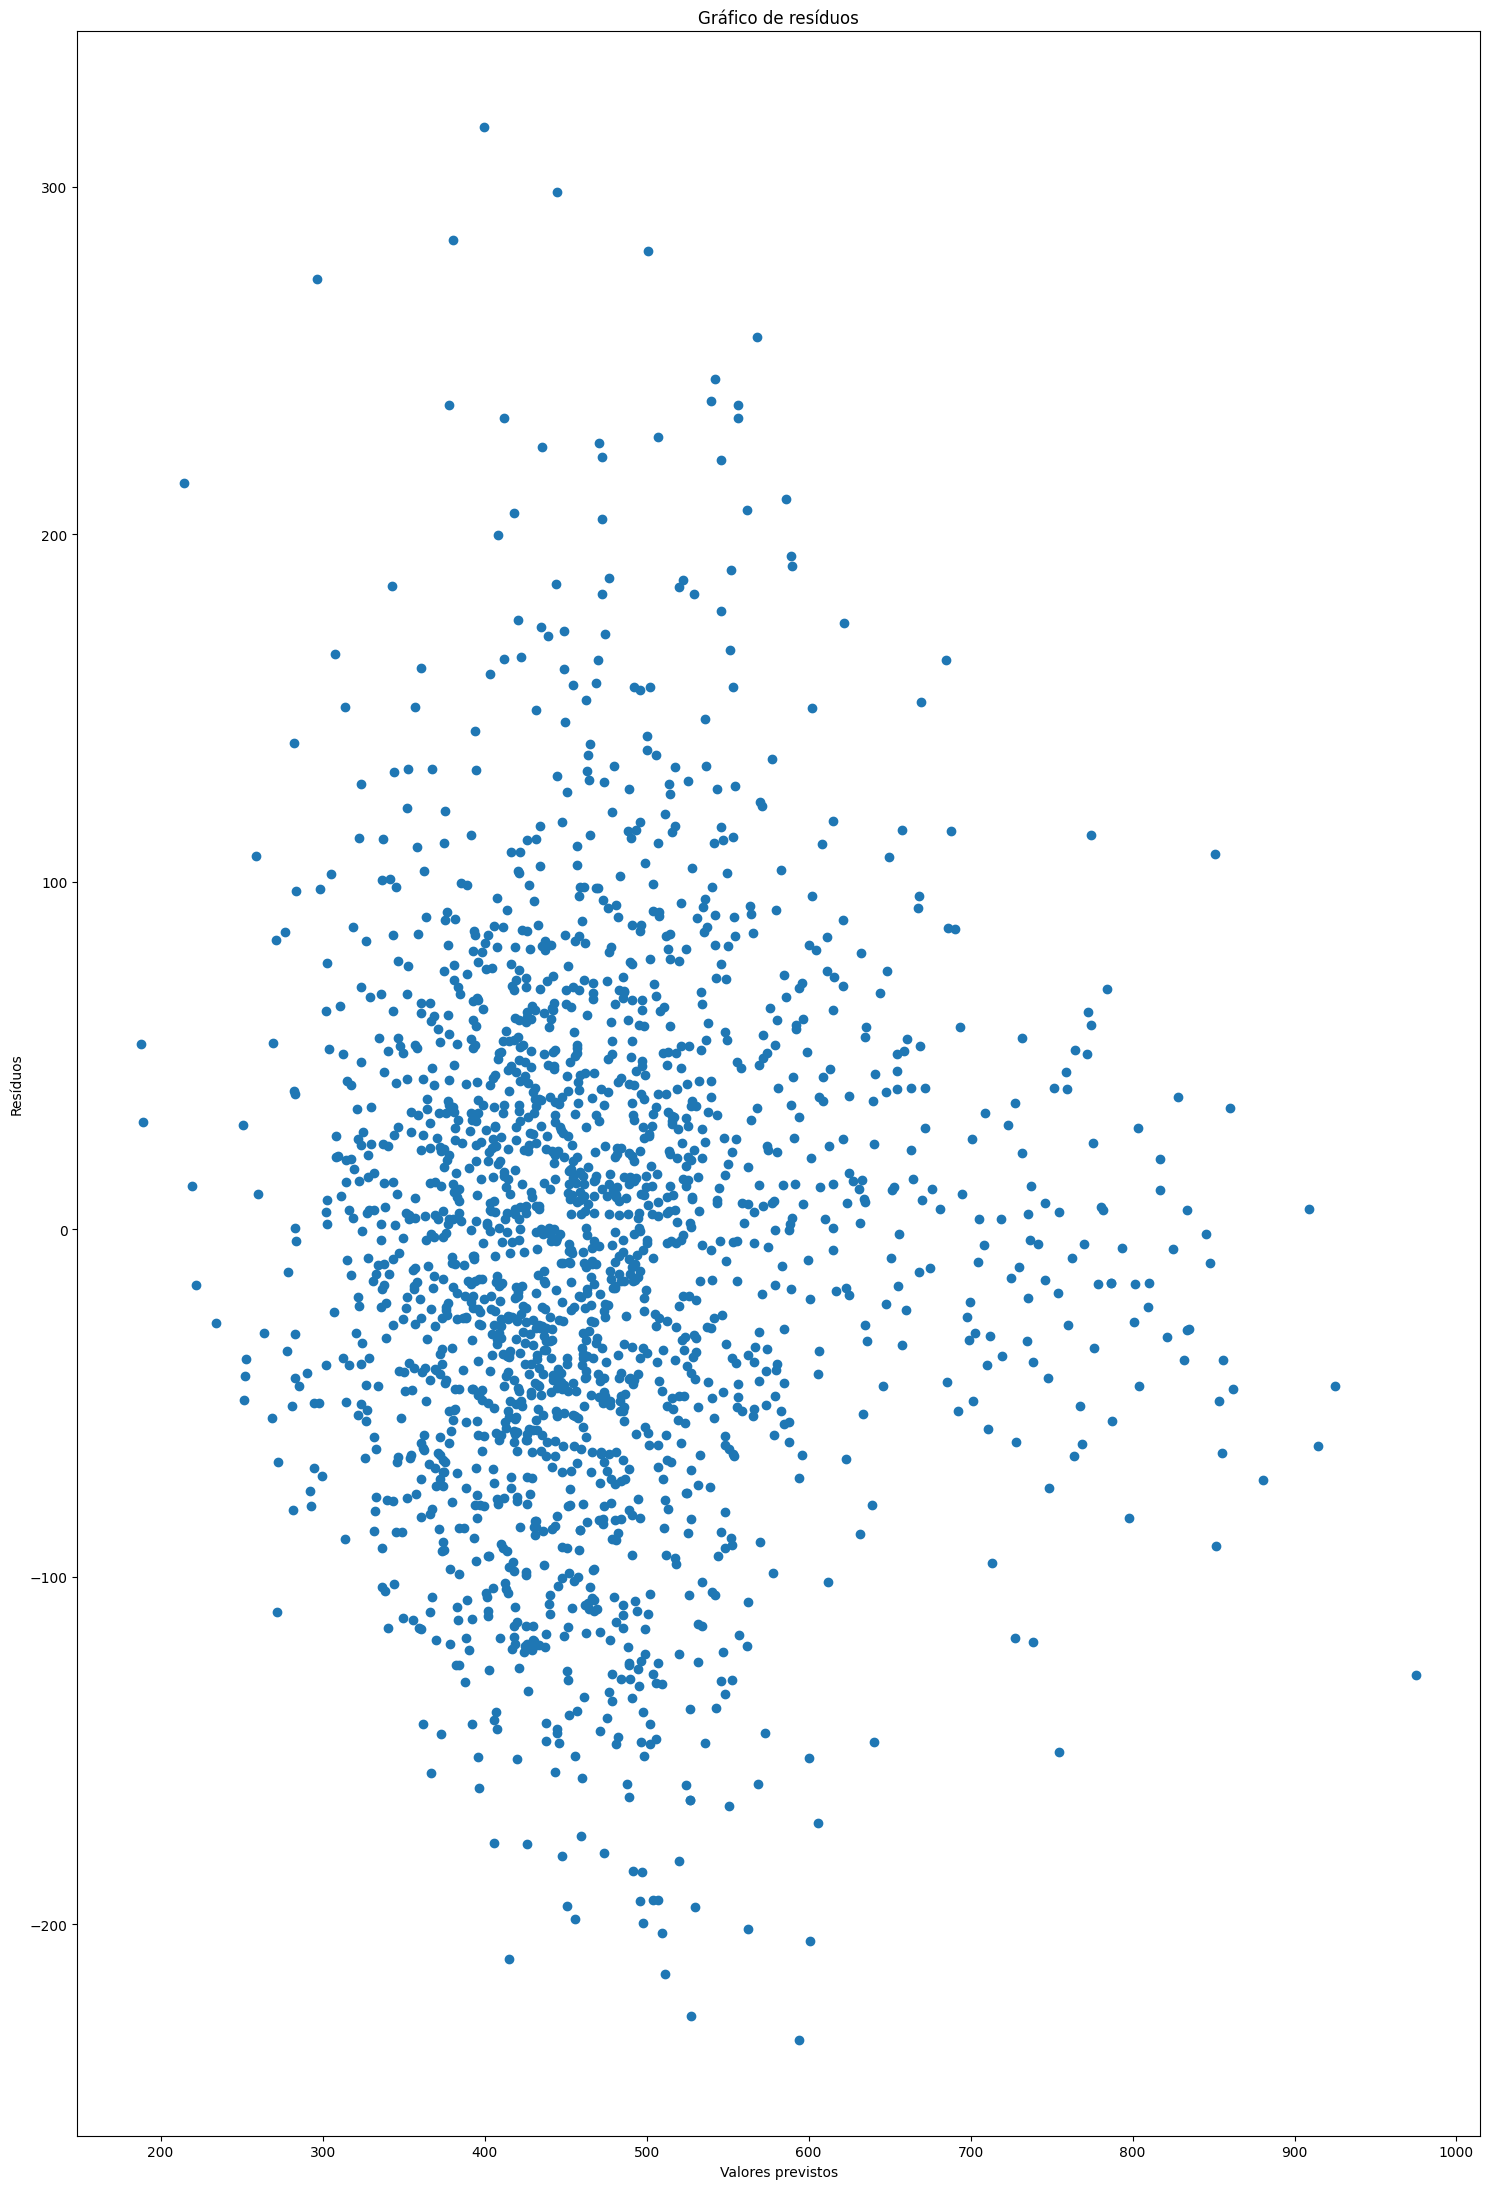

In [1254]:
# Agora vamos fazer uma analise de residuos

# Calculando os residuos
residuos = y_test - y_pred

# Analisando os residuos
print("Média dos resíduos: ", np.mean(residuos))
print("Desvio padrão dos resíduos: ", np.std(residuos))

# Plotando os residuos
plt.scatter(y_pred, residuos)
plt.xlabel('Valores previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de resíduos')
plt.show()

Pelo gráfico dos resíduos, podemos ver uma dispersão aleatória.